In [368]:
# Data manipulation
import numpy as np
import pandas as pd

In [369]:
import glob
# get the absolute paths of all Excel files 
all_files = glob.glob("/Users/shanelsingh/Desktop/Ignite/Data Files/*.xlsx")

In [370]:
#read files into dataframe

dataframes = []  # Create an empty list to store dfs
for file in all_files:
    dataframes.append(pd.read_excel(file))  # Read each file and append to the list

df = pd.concat(dataframes)  # Concatenate all dfs into one
df.head()

,student_number,school_name,current_grade_level,starting_reading_grade_lvl,starting_protocol_name,ending_protocol_name,ending_reading_grade_lvl,number_of_tutoring_sessions_per_ignite_lesson,student_attendance_rate,total_sessions_attended,total_sessions_scheduled,num_hours_receiving_instruction
0,5428,Tucson ES,1st,K,BAK,RCV,1st,1.444444,0.811475,99,122,18.7462
1,6860,Tucson ES,2nd,1st,B+D,VCE,1st,1.157895,0.793651,50,63,12.0828
2,8987,Tucson ES,1st,K,BAK,RCV,1st,1.380282,0.852459,104,122,24.6656
3,26683,Tucson ES,1st,K,ULS,B+D,1st,1.491803,0.803279,98,122,22.1482
4,26928,Tucson ES,4th,1st,B+D,MSD 7-9,2nd,0.961165,0.892562,108,121,25.9828


In [371]:
print(df.shape)
print(df.dtypes)

(1020, 12)
student_number                                     int64
school_name                                       object
current_grade_level                               object
starting_reading_grade_lvl                        object
starting_protocol_name                            object
ending_protocol_name                              object
ending_reading_grade_lvl                          object
number_of_tutoring_sessions_per_ignite_lesson    float64
student_attendance_rate                          float64
total_sessions_attended                            int64
total_sessions_scheduled                           int64
num_hours_receiving_instruction                  float64
dtype: object


In [372]:
print(df.columns)

Index(['student_number', 'school_name', 'current_grade_level',
       'starting_reading_grade_lvl', 'starting_protocol_name',
       'ending_protocol_name', 'ending_reading_grade_lvl',
       'number_of_tutoring_sessions_per_ignite_lesson',
       'student_attendance_rate', 'total_sessions_attended',
       'total_sessions_scheduled', 'num_hours_receiving_instruction'],
      dtype='object')


# Change Data Types

In [373]:
#change datatype to category 

df[["school_name","current_grade_level","starting_reading_grade_lvl","starting_protocol_name",
    "ending_protocol_name","ending_reading_grade_lvl"]] = df[["school_name","current_grade_level",
    "starting_reading_grade_lvl","starting_protocol_name","ending_protocol_name", 
    "ending_reading_grade_lvl"]].astype('category') 

In [374]:
print(df.dtypes)
df.describe() #Review summary stats for outliers or inconsistencies


student_number                                      int64
school_name                                      category
current_grade_level                              category
starting_reading_grade_lvl                       category
starting_protocol_name                           category
ending_protocol_name                             category
ending_reading_grade_lvl                         category
number_of_tutoring_sessions_per_ignite_lesson     float64
student_attendance_rate                           float64
total_sessions_attended                             int64
total_sessions_scheduled                            int64
num_hours_receiving_instruction                   float64
dtype: object


,student_number,number_of_tutoring_sessions_per_ignite_lesson,student_attendance_rate,total_sessions_attended,total_sessions_scheduled,num_hours_receiving_instruction
count,1020.000000,1008.000000,1020.000000,1020.000000,1020.000000,1012.000000
mean,500857.683333,1.469207,0.823732,99.077451,118.954902,22.316393
std,289111.607591,0.574703,0.154113,39.337708,42.480474,8.899364
min,71.000000,0.000000,0.000000,0.000000,11.000000,0.233300
25%,250795.750000,1.136253,0.783413,64.000000,89.750000,14.807025
50%,494934.000000,1.333333,0.865578,110.000000,135.000000,24.572800
75%,751838.000000,1.620690,0.923721,131.000000,152.000000,29.673375
max,999889.000000,7.000000,1.000000,175.000000,181.000000,41.698000


# Cleaning NaNs and Duplicates

In [375]:
#Cleaning missing data
df.isna().sum()

student_number                                     0
school_name                                        0
current_grade_level                                0
starting_reading_grade_lvl                       170
starting_protocol_name                            46
ending_protocol_name                              36
ending_reading_grade_lvl                         122
number_of_tutoring_sessions_per_ignite_lesson     12
student_attendance_rate                            0
total_sessions_attended                            0
total_sessions_scheduled                           0
num_hours_receiving_instruction                    8
dtype: int64

student_number                                     0
school_name                                        0
current_grade_level                                0
starting_reading_grade_lvl                       170
starting_protocol_name                            46
ending_protocol_name                              36
ending_reading_grade_lvl                         122
number_of_tutoring_sessions_per_ignite_lesson     12
student_attendance_rate                            0
total_sessions_attended                            0
total_sessions_scheduled                           0
num_hours_receiving_instruction                    8
dtype: int64


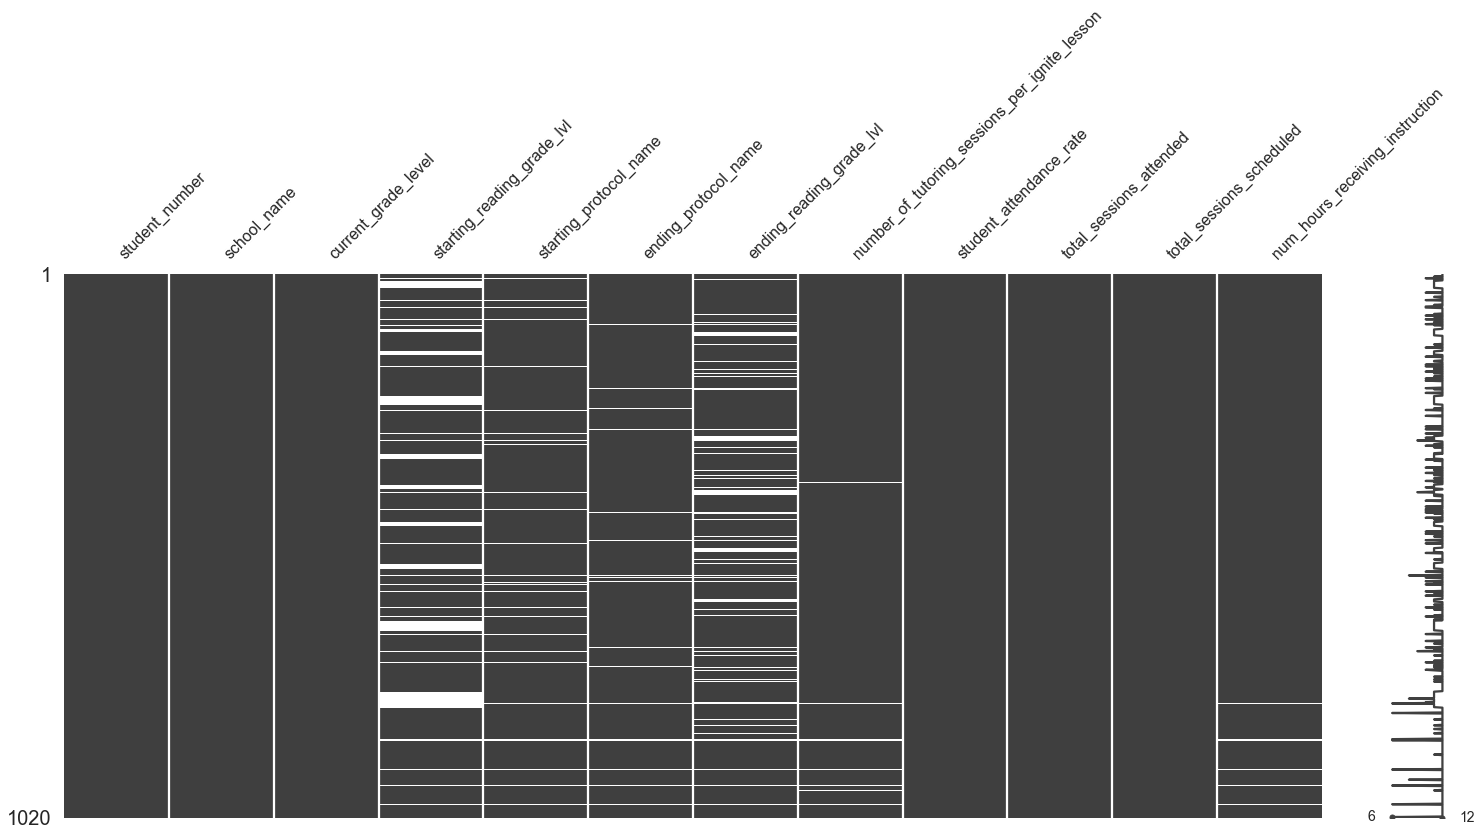

In [376]:
print(df.isna().sum())

import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.show()

In [377]:
#filling in missing starting grade level based on the starting protocol for kindergarten 
df['starting_reading_grade_lvl'] = np.where(df['starting_protocol_name'].isin(['BAK', 'ULS', 'ULP']), 'K', df['starting_reading_grade_lvl'])
df['ending_reading_grade_lvl'] = np.where(df['ending_protocol_name'].isin(['BAK', 'ULS', 'ULP']), 'K', df['ending_reading_grade_lvl'])

In [378]:
#filling in missing starting grade level based on the starting protocol for 1st grade
df['starting_reading_grade_lvl'] = np.where(df['starting_protocol_name'].isin(['B+D', 'RCV', 'VCE','VT']), '1st', df['starting_reading_grade_lvl'])
df['ending_reading_grade_lvl'] = np.where(df['ending_protocol_name'].isin(['B+D', 'RCV', 'VCE','VT']), '1st', df['ending_reading_grade_lvl'])

In [379]:
#filling in missing starting grade level based on the starting protocol for 2nd grade
df['starting_reading_grade_lvl'] = np.where(df['starting_protocol_name'].isin(['MSD 1-3', 'MSD 4-6', 'MSD 7-9','MSD 10-12', 'MSD 13-14', 'MSD 15-18']), '2nd', df['starting_reading_grade_lvl'])
df['ending_reading_grade_lvl'] = np.where(df['ending_protocol_name'].isin(['MSD 1-3', 'MSD 4-6', 'MSD 7-9','MSD 10-12', 'MSD 13-14', 'MSD 15-18']), '2nd', df['ending_reading_grade_lvl'])

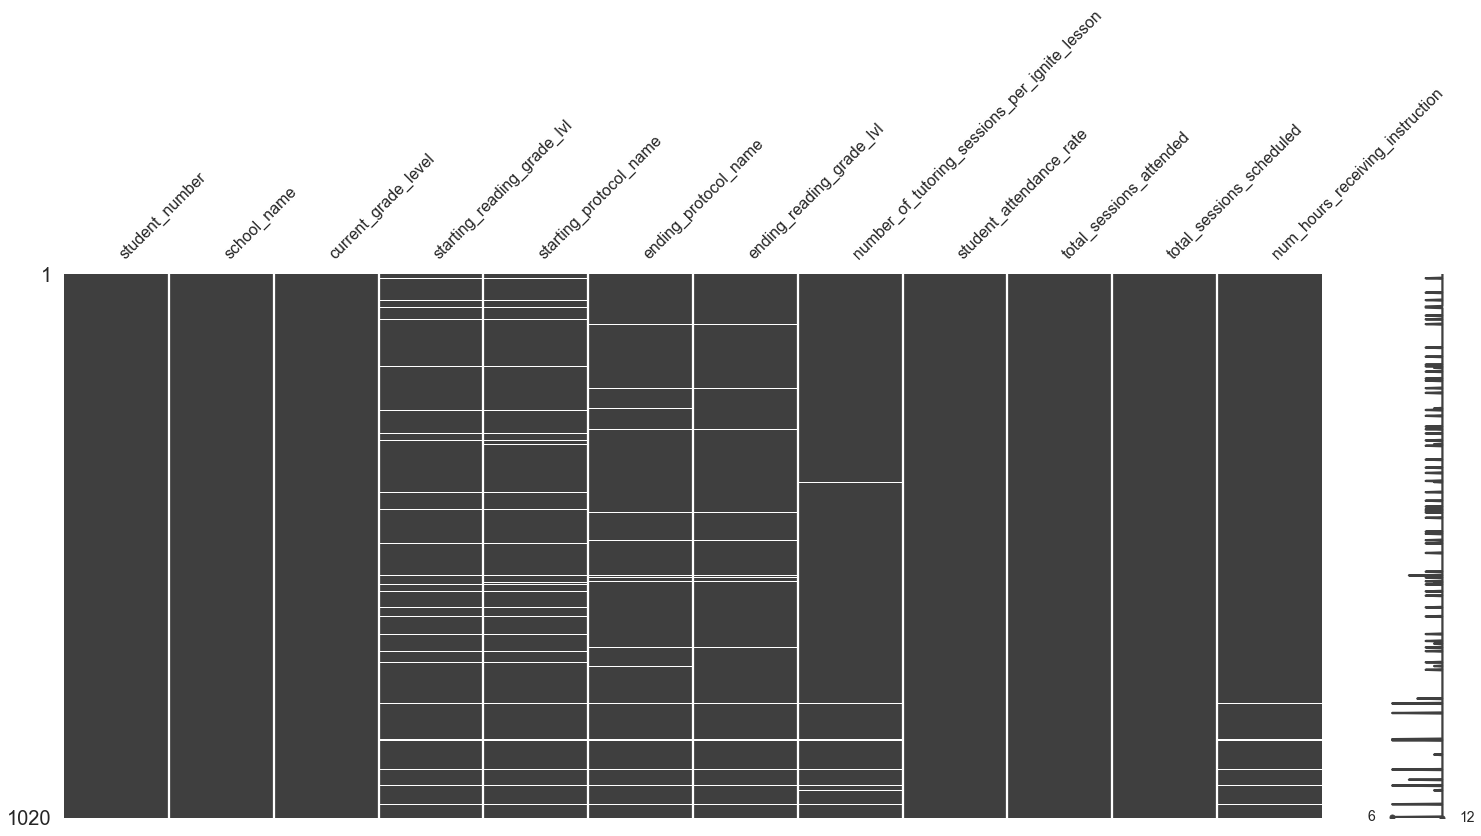

In [380]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.show()

In [381]:
df_dropped = df.dropna(subset = ['starting_protocol_name','ending_protocol_name'])
print(df_dropped.isna().sum())
print(df_dropped.shape)
print(948/1020)
print(1020-948) #about 7% (72 records) of the data was dropped due to lack of starting or ending protocol data

student_number                                   0
school_name                                      0
current_grade_level                              0
starting_reading_grade_lvl                       0
starting_protocol_name                           0
ending_protocol_name                             0
ending_reading_grade_lvl                         0
number_of_tutoring_sessions_per_ignite_lesson    3
student_attendance_rate                          0
total_sessions_attended                          0
total_sessions_scheduled                         0
num_hours_receiving_instruction                  0
dtype: int64
(948, 12)
0.9294117647058824
72


In [382]:
#look for duplicate values

duplicates = df_dropped.duplicated(subset = ('student_number','school_name'),keep = False)
df_dropped[duplicates].sort_values(by = 'num_hours_receiving_instruction')

,student_number,school_name,current_grade_level,starting_reading_grade_lvl,starting_protocol_name,ending_protocol_name,ending_reading_grade_lvl,number_of_tutoring_sessions_per_ignite_lesson,student_attendance_rate,total_sessions_attended,total_sessions_scheduled,num_hours_receiving_instruction


# Standardizing School Names

In [383]:
df_dropped['school_name'].unique()

['Tucson ES', 'Mill St ES', 'Apple Valley School', 'Eggerville Elementary School', 'Palomar Hills ES', 'Alamanda School of the Arts', 'Hamilton Elem School', 'Anderson ES', 'Miss. Public School', 'Richland E School']
Categories (10, object): ['Alamanda School of the Arts', 'Anderson ES', 'Apple Valley School', 'Eggerville Elementary School', ..., 'Miss. Public School', 'Palomar Hills ES', 'Richland E School', 'Tucson ES']

In [384]:
#map and replace current school names to standardized school names

replacements = {
    'Tucson ES': 'Tucson',
    'Mill St ES': 'Mill St.',
    'Apple Valley School': 'Apple Valley',
    'Eggerville Elementary School': 'Eggerville',
    'Palomar Hills ES': 'Palomar Hills',
    'Alamanda School of the Arts': 'Alamanda',
    'Hamilton Elem School': 'Hamilton',
    'Anderson ES': 'Anderson',
    'Miss. Public School': 'Mississsippi',
    'Richland E School': 'Richland'
}

df_dropped['school_name'] = df_dropped['school_name'].replace(replacements)

df_dropped['school_name'].unique()

/var/folders/pv/y41sdgvs52jfg17yd44s27400000gn/T/ipykernel_2865/462183798.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['school_name'] = df_dropped['school_name'].replace(replacements)


array(['Tucson', 'Mill St.', 'Apple Valley', 'Eggerville',
       'Palomar Hills', 'Alamanda', 'Hamilton', 'Anderson',
       'Mississsippi', 'Richland'], dtype=object)

In [385]:
df_clean = df_dropped
df_clean.head()


,student_number,school_name,current_grade_level,starting_reading_grade_lvl,starting_protocol_name,ending_protocol_name,ending_reading_grade_lvl,number_of_tutoring_sessions_per_ignite_lesson,student_attendance_rate,total_sessions_attended,total_sessions_scheduled,num_hours_receiving_instruction
0,5428,Tucson,1st,K,BAK,RCV,1st,1.444444,0.811475,99,122,18.7462
1,6860,Tucson,2nd,1st,B+D,VCE,1st,1.157895,0.793651,50,63,12.0828
2,8987,Tucson,1st,K,BAK,RCV,1st,1.380282,0.852459,104,122,24.6656
3,26683,Tucson,1st,K,ULS,B+D,1st,1.491803,0.803279,98,122,22.1482
4,26928,Tucson,4th,1st,B+D,MSD 7-9,2nd,0.961165,0.892562,108,121,25.9828


student_number                                   0
school_name                                      0
current_grade_level                              0
starting_reading_grade_lvl                       0
starting_protocol_name                           0
ending_protocol_name                             0
ending_reading_grade_lvl                         0
number_of_tutoring_sessions_per_ignite_lesson    3
student_attendance_rate                          0
total_sessions_attended                          0
total_sessions_scheduled                         0
num_hours_receiving_instruction                  0
dtype: int64


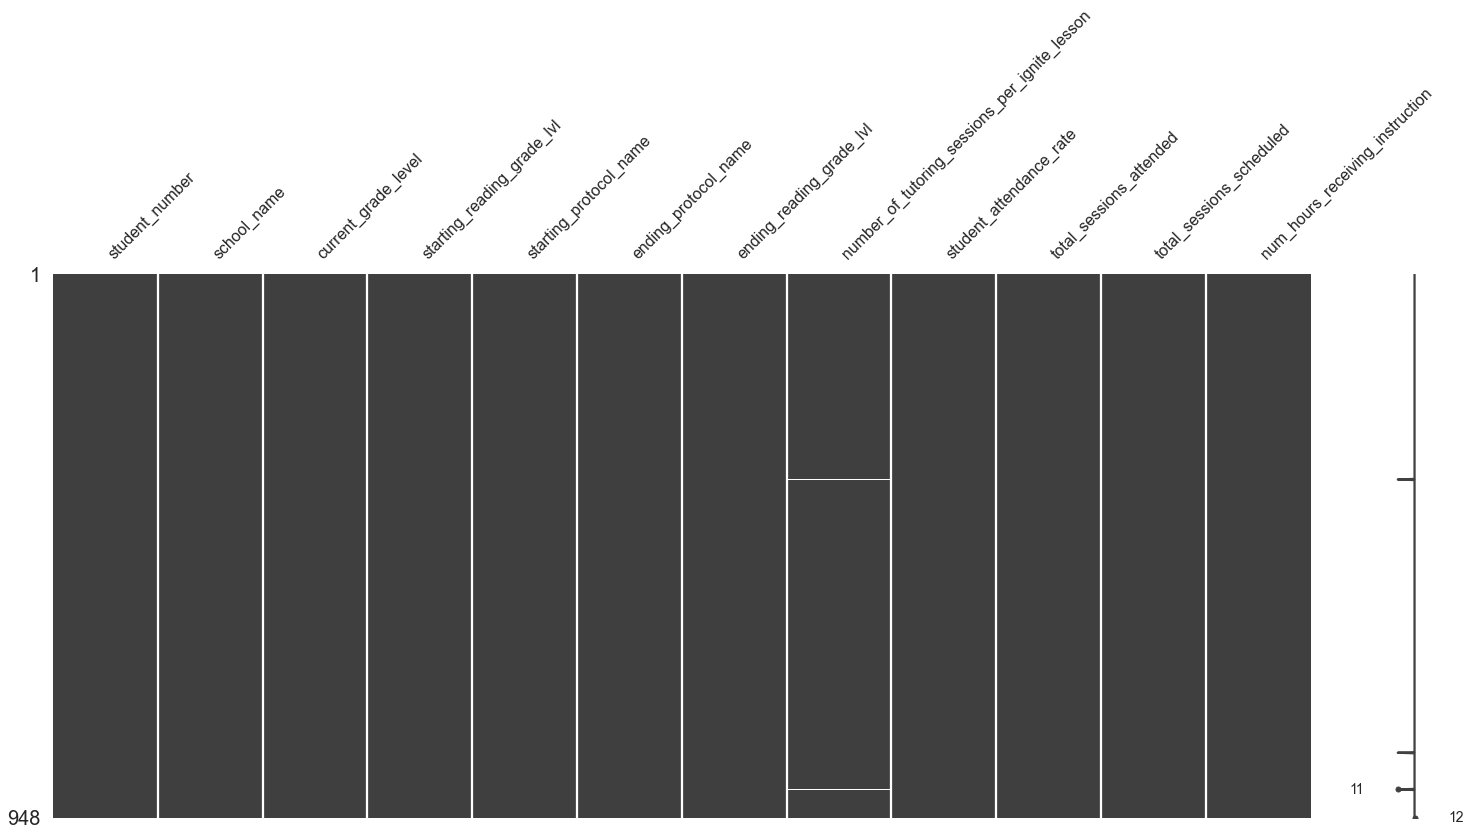

In [386]:
print(df_clean.isna().sum())

import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df_clean)
plt.show()

# Analysis

The marketing team is looking for a school to highlight in a case study, but needs help
identifying which school tells the best story about the effectiveness of Ignite Reading's program.

In this instance, effectiveness is defined as the % of students that started the school year with Kindergarten-level reading skills and ended the year with 1st or 2nd grade reading skills. Your task is to analyze the attached data and find which school to highlight.

In your presentation, you will need to perform some data cleaning prior to your analysis and also
combine multiple datasets. Once complete, you should explore what might explain why the
highlighted school performed the strongest and detail your findings in a presentation.

In [387]:
# Filter students who started at Kindergarten-level
k_students = df_clean[df_clean['starting_reading_grade_lvl'] == 'K']

# Identify students who ended the year at 1st or 2nd grade
k_students['improved'] = ((k_students['ending_reading_grade_lvl'] == '1st') | 
                          (k_students['ending_reading_grade_lvl'] == '2nd')).astype(int)
k_students.head()

/var/folders/pv/y41sdgvs52jfg17yd44s27400000gn/T/ipykernel_2865/1499864323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_students['improved'] = ((k_students['ending_reading_grade_lvl'] == '1st') |


,student_number,school_name,current_grade_level,starting_reading_grade_lvl,starting_protocol_name,ending_protocol_name,ending_reading_grade_lvl,number_of_tutoring_sessions_per_ignite_lesson,student_attendance_rate,total_sessions_attended,total_sessions_scheduled,num_hours_receiving_instruction,improved
0,5428,Tucson,1st,K,BAK,RCV,1st,1.444444,0.811475,99,122,18.7462,1
2,8987,Tucson,1st,K,BAK,RCV,1st,1.380282,0.852459,104,122,24.6656,1
3,26683,Tucson,1st,K,ULS,B+D,1st,1.491803,0.803279,98,122,22.1482,1
5,38211,Tucson,2nd,K,ULS,ULP,K,1.535714,0.761905,48,63,10.8823,0
7,56096,Tucson,2nd,K,ULP,VCE,1st,1.259259,0.726415,77,106,17.3485,1


# School with the highest percentage of reading growth

In [388]:
# Calculate effectiveness by school: total improved divided by total students starting at K level

effectiveness = k_students.groupby('school_name').agg(total_k_students=('student_number', 'count'),total_improved=('improved', 'sum'))
effectiveness['% effectiveness'] = (effectiveness['total_improved'] / effectiveness['total_k_students']) * 100

effectiveness_df = effectiveness.reset_index()

# Sort schools by effectiveness percentage
effectiveness_df = effectiveness_df.sort_values(by='% effectiveness', ascending=False)

effectiveness_df

,school_name,total_k_students,total_improved,% effectiveness
1,Anderson,49,46,93.877551
9,Tucson,31,29,93.548387
6,Mississsippi,59,53,89.830508
2,Apple Valley,50,44,88.000000
4,Hamilton,35,30,85.714286
7,Palomar Hills,47,40,85.106383
3,Eggerville,27,20,74.074074
5,Mill St.,26,19,73.076923
0,Alamanda,30,21,70.000000
8,Richland,124,83,66.935484


In [389]:
# Display the school with highest % of students who improved reading skills
top_school = effectiveness_df.head(3)
print("Schools with the highest % of students who improved reading skills:")
print(top_school['school_name'])

Schools with the highest % of students who improved reading skills:
1        Anderson
9          Tucson
6    Mississsippi
Name: school_name, dtype: object


# School with the highest attendance rate

In [390]:
attendance = k_students.groupby('school_name').agg(total_sessions_attended=('total_sessions_attended','sum'),total_sessions_scheduled=('total_sessions_scheduled','sum'))
attendance['attendance_rate'] = attendance['total_sessions_attended']/attendance['total_sessions_scheduled'] *100
attend_df=attendance.reset_index()
attend_df=attend_df.sort_values(by='attendance_rate',ascending=False)
attend_df


,school_name,total_sessions_attended,total_sessions_scheduled,attendance_rate
2,Apple Valley,5247,5629,93.213715
5,Mill St.,1628,1753,92.869367
6,Mississsippi,7515,8169,91.994124
7,Palomar Hills,6035,6693,90.168833
3,Eggerville,2677,3122,85.746316
1,Anderson,6336,7494,84.547638
9,Tucson,2833,3369,84.090234
0,Alamanda,2870,3478,82.518689
4,Hamilton,2860,3566,80.201907
8,Richland,12235,17167,71.270461


In [391]:
k_students.head()

,student_number,school_name,current_grade_level,starting_reading_grade_lvl,starting_protocol_name,ending_protocol_name,ending_reading_grade_lvl,number_of_tutoring_sessions_per_ignite_lesson,student_attendance_rate,total_sessions_attended,total_sessions_scheduled,num_hours_receiving_instruction,improved
0,5428,Tucson,1st,K,BAK,RCV,1st,1.444444,0.811475,99,122,18.7462,1
2,8987,Tucson,1st,K,BAK,RCV,1st,1.380282,0.852459,104,122,24.6656,1
3,26683,Tucson,1st,K,ULS,B+D,1st,1.491803,0.803279,98,122,22.1482,1
5,38211,Tucson,2nd,K,ULS,ULP,K,1.535714,0.761905,48,63,10.8823,0
7,56096,Tucson,2nd,K,ULP,VCE,1st,1.259259,0.726415,77,106,17.3485,1


# School Instructional Efficiency

In [392]:
# School with the highest number of hours per lesson

instruct_hours = k_students.groupby('school_name').agg(total_instruction_hours=('num_hours_receiving_instruction','sum'),total_sessions_attended=('total_sessions_attended','sum'),total_tutoring_sessions_per_lesson=('number_of_tutoring_sessions_per_ignite_lesson','sum'),total_k_students=('student_number', 'count'))
instruct_hours

instruct_hours['avg_hours_per_sess'] = instruct_hours['total_instruction_hours']/instruct_hours['total_sessions_attended']
instruct_hours['avg_hours_per_student'] = instruct_hours['total_instruction_hours']/instruct_hours['total_k_students']
instruct_hours['avg_sessions_per_student'] = instruct_hours['total_sessions_attended']/instruct_hours['total_k_students']
instruct_hours

hours_df = instruct_hours.reset_index()
hours_df=hours_df.sort_values(by='avg_hours_per_student',ascending=True)
hours_df


,school_name,total_instruction_hours,total_sessions_attended,total_tutoring_sessions_per_lesson,total_k_students,avg_hours_per_sess,avg_hours_per_student,avg_sessions_per_student
5,Mill St.,387.8674,1628,39.038138,26,0.238248,14.917977,62.615385
4,Hamilton,653.3710,2860,44.884110,35,0.228451,18.667743,81.714286
0,Alamanda,615.6497,2870,57.716222,30,0.214512,20.521657,95.666667
9,Tucson,637.4633,2833,41.785733,31,0.225014,20.563332,91.387097
3,Eggerville,575.1497,2677,43.145330,27,0.214849,21.301841,99.148148
8,Richland,2651.1753,12235,212.694037,124,0.216688,21.380446,98.669355
2,Apple Valley,1234.4766,5247,68.671328,50,0.235273,24.689532,104.940000
1,Anderson,1318.8625,6336,77.266785,49,0.208154,26.915561,129.306122
7,Palomar Hills,1397.7968,6035,73.238795,47,0.231615,29.740357,128.404255
6,Mississsippi,1767.9940,7515,77.737217,59,0.235262,29.966000,127.372881


In [393]:
hours_df
attend_df
effectiveness_df
school_df = pd.merge(hours_df, attend_df, on='school_name')
school_df = pd.merge(school_df,effectiveness_df, on='school_name')
school_df = school_df.drop(['total_sessions_attended_y','total_k_students_y'], axis=1)
school_df['instruct_efficiency'] = school_df['% effectiveness']/school_df['avg_hours_per_student']
school_df=school_df.sort_values(by='instruct_efficiency',ascending=False)
school_df

,school_name,total_instruction_hours,total_sessions_attended_x,total_tutoring_sessions_per_lesson,total_k_students_x,avg_hours_per_sess,avg_hours_per_student,avg_sessions_per_student,total_sessions_scheduled,attendance_rate,total_improved,% effectiveness,instruct_efficiency
0,Mill St.,387.8674,1628,39.038138,26,0.238248,14.917977,62.615385,1753,92.869367,19,73.076923,4.898581
1,Hamilton,653.3710,2860,44.884110,35,0.228451,18.667743,81.714286,3566,80.201907,30,85.714286,4.591572
3,Tucson,637.4633,2833,41.785733,31,0.225014,20.563332,91.387097,3369,84.090234,29,93.548387,4.549282
6,Apple Valley,1234.4766,5247,68.671328,50,0.235273,24.689532,104.940000,5629,93.213715,44,88.000000,3.564264
7,Anderson,1318.8625,6336,77.266785,49,0.208154,26.915561,129.306122,7494,84.547638,46,93.877551,3.487854
4,Eggerville,575.1497,2677,43.145330,27,0.214849,21.301841,99.148148,3122,85.746316,20,74.074074,3.477356
2,Alamanda,615.6497,2870,57.716222,30,0.214512,20.521657,95.666667,3478,82.518689,21,70.000000,3.411031
5,Richland,2651.1753,12235,212.694037,124,0.216688,21.380446,98.669355,17167,71.270461,83,66.935484,3.130687
9,Mississsippi,1767.9940,7515,77.737217,59,0.235262,29.966000,127.372881,8169,91.994124,53,89.830508,2.997748
8,Palomar Hills,1397.7968,6035,73.238795,47,0.231615,29.740357,128.404255,6693,90.168833,40,85.106383,2.861646


In [394]:
school_df.to_csv('2025.01.24 Ignite School Effectiveness_3.csv', index=False)

# Visualizations

In [395]:
import matplotlib.pyplot as plt
import seaborn as sns

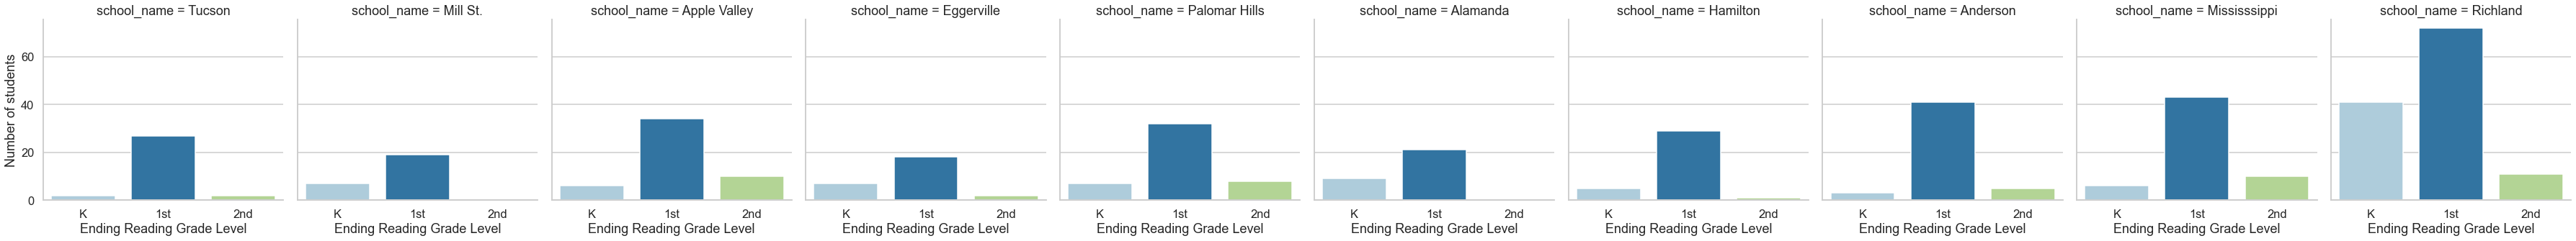

In [396]:
sns.set_style('whitegrid')
sns.set_palette('Paired')
#sns.mpl_palette("viridis")
sns.set_context('talk')

category_order = ['K','1st','2nd']

g = sns.catplot(x='ending_reading_grade_lvl',
            data=k_students, 
            col='school_name',
            kind='count',
            order=category_order)

g.set(xlabel='Ending Reading Grade Level',
      ylabel='Number of students')

#g.set_titles('Improved at {school_name}')

plt.show()

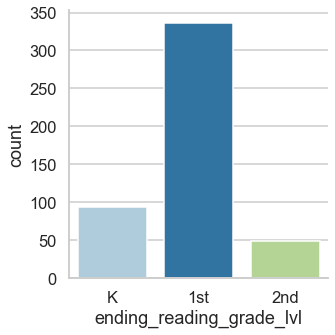

In [397]:
sns.set_style('whitegrid')
sns.set_palette('Paired')
#sns.mpl_palette("viridis")
sns.set_context('talk')

category_order = ['K','1st','2nd']

sns.catplot(x='ending_reading_grade_lvl', 
            data=k_students, 
            kind='count',
            order=category_order)
plt.show()